# Grip spark foundation

# Data science and business analytics task MAY2021 Task

# Task : prediction using supervised ML-preapared by santosh madik

In [140]:
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
# Reading data 
data = pd.read_csv("http://bit.ly/w-data")

data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [143]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [144]:
data.shape

(25, 2)

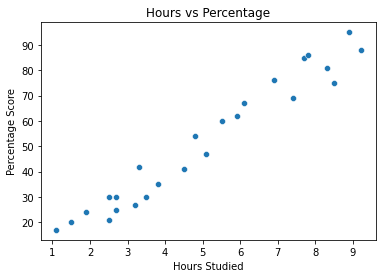

In [145]:
sns.scatterplot(x=data['Hours'],y=data['Scores'])
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# preparing data

In [146]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 
print('X :',X)
print('y: ',y)

X : [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
y:  [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [147]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, random_state=100)

# traning Algorithm

In [148]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 



LinearRegression()

In [149]:
X_train.shape


(17, 1)

In [150]:
X_test.shape

(8, 1)

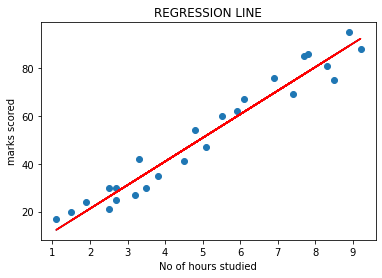

In [151]:
#plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.xlabel('No of hours studied')
plt.ylabel('marks scored')
plt.title('REGRESSION LINE')
plt.plot(X,line,color='red')
plt.show()

# **making prediction**

In [152]:
pred_y=regressor.predict(X_test)
pred=pd.DataFrame({'actual':[i[0]for i in X_test],'predicted marks':[k for k in pred_y]})
pred

,actual,predicted marks
0,2.7,28.148771
1,3.8,39.007657
2,3.3,34.071800
3,5.9,59.738257
4,1.5,16.302714
5,7.4,74.545829
6,6.9,69.609972
7,4.8,48.879371


In [153]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours:",hours)
print("Predicted Score:",own_pred[0])

No of Hours: 9.25
Predicted Score: 92.80850057353504


# Evaluating the Model

In [154]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test,pred_y)) 

Mean Absolute Error: 4.762517892332275
